PROJECT 6 CLUSTERING 

##  Load libraries and data

In [4]:
# import main general libraries (specific libraries will be imported in sub sections)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics


In [5]:
df=pd.read_excel('Credit Card Customer Data.xlsx')

In [6]:
pwd

'C:\\Users\\Tomek\\Desktop\\Artificial Intelligence\\PROJECTS\\Project 6-Unsupervised Learning'

#import data 
df=pd.read_csv('Credit Card Customer Data.csv')

In [7]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#  EDA

In [9]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### CLEANING THE DATA  
1) Check for missing & duplicate values

2) Remove Columns that do not add uniquness to cluster

3) Outlayer Treatment




In [10]:
# any missing values ?
df.isnull().values.any()

False

In [11]:
# any duplicates ?
duplicates=df.duplicated()
sum(duplicates)

0

In [12]:
df.head(0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [13]:
# remove columns that do not add any uniquness to cluster and make no sense
# in comparing distance measures - SI_No and Customer ID
df.drop('Sl_No',axis=1, inplace=True)
df.drop('Customer Key',axis=1, inplace=True)

In [14]:
# check & see how dataframe attribiutes look
df.tail(1)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
659,167000,9,0,12,2


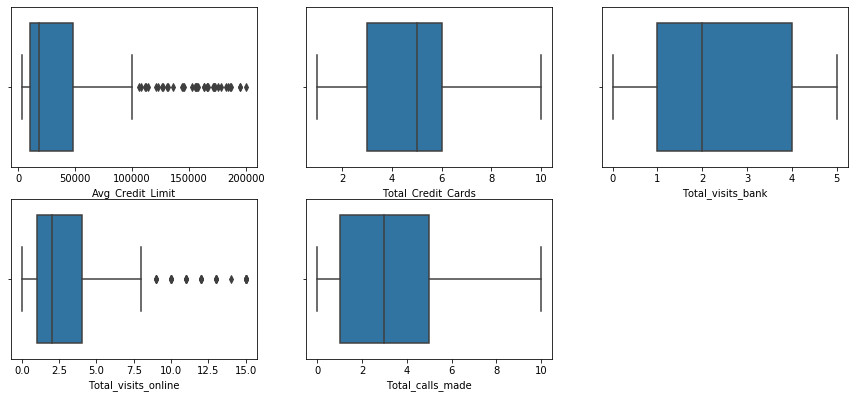

In [15]:
# Outlayer Treatment Visualization check - Boxplot

plt.figure(figsize=(15,10))
pos=1
for i in df.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df[i])
    pos+=1

In [16]:
# Outlayer Treatment  for Ave. Credit Card  Limit and Total Visits Online

for i in df.columns :
    q1,q2,q3=df[i].quantile([0.25,0.5,.75])
    IQR=q3-q1
    upper_cap=q3+1.5*IQR
    lower_cap=q1-1.5*IQR
    df[i]=df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))
    




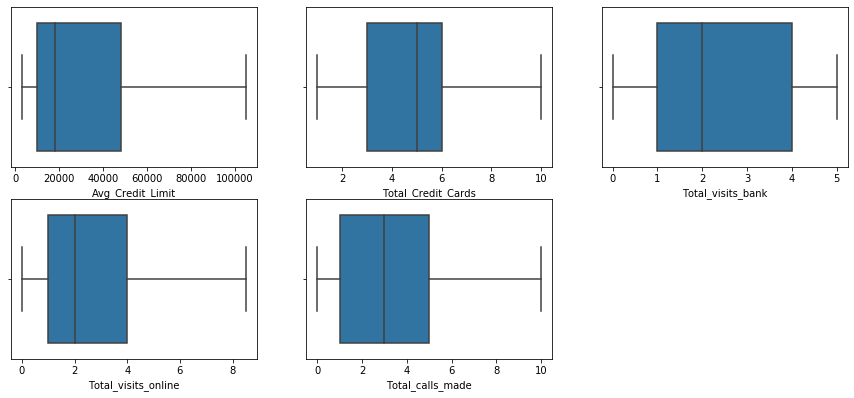

In [17]:
# check how outlayers look after treatment

plt.figure(figsize=(15,10))
pos=1
for i in df.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df[i])
    pos+=1

 no outlayers present  ! 
EDA COMPLETED !

## UNIVARIATE ANALYSIS

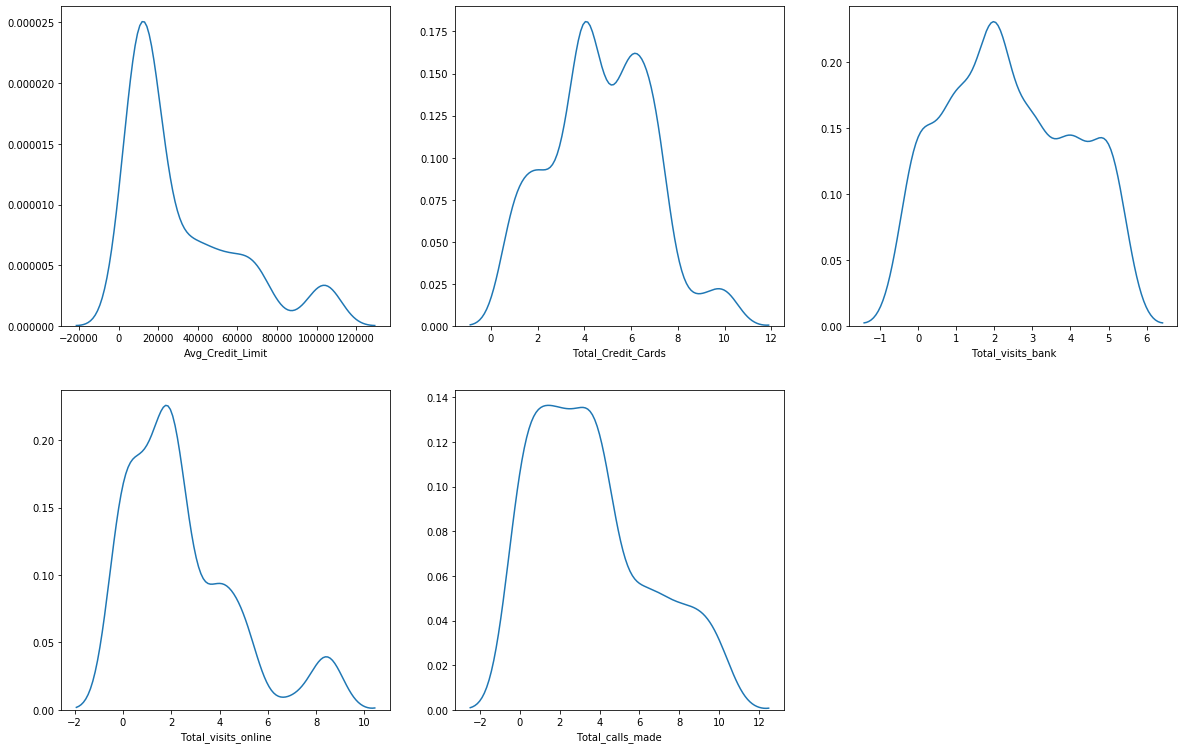

In [18]:
# UNIVARIATE SMOOTHED HISTOGRAMS

plt.figure(figsize=(20,20))
pos= 1

for i in df.columns :
    plt.subplot (3,3,pos)
    sns.distplot(df[i],hist=False)
    pos+=1
    
    

 INFERENCE FROM VISUALS ABOVE 
 Average Credit Card  Limit - is rigtly skewed, and has a second hump hence
                              it will have at least 2 clusters
 Total Credit Cards         - has 2 large peaks and 2 smaller ones,likely to                                 have 4 clisters  
 Total Visits Bank          - head and one shoulder - 2 or more clusters
 Total Visits Online         - cascading down, 3 clusters likely
 Total Calls                - likely to have 2 clusters - head and one shoulder

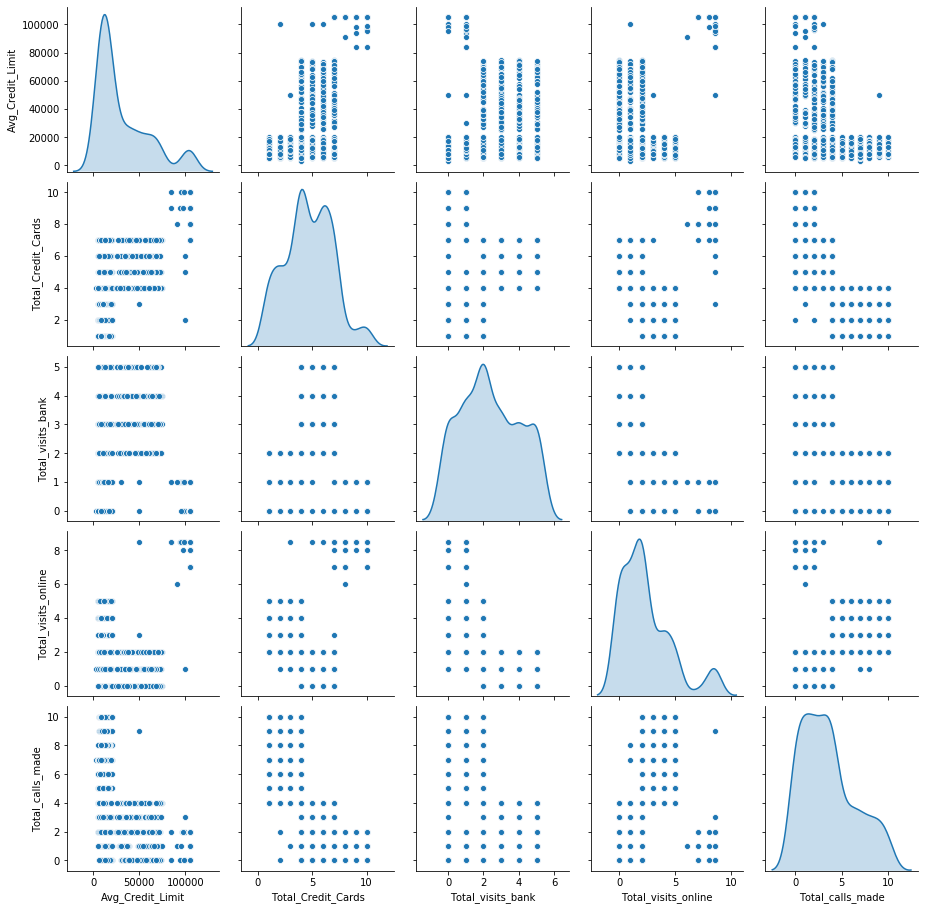

In [19]:
# Bi-variate Analysis 
sns.pairplot(df,diag_kind='kde')

Bivariate analysis really does not give us much information in this
case save the same as the univariate visual above - while not necessary I added it to insure i miss nothing 


In [20]:
# Check for Correlation

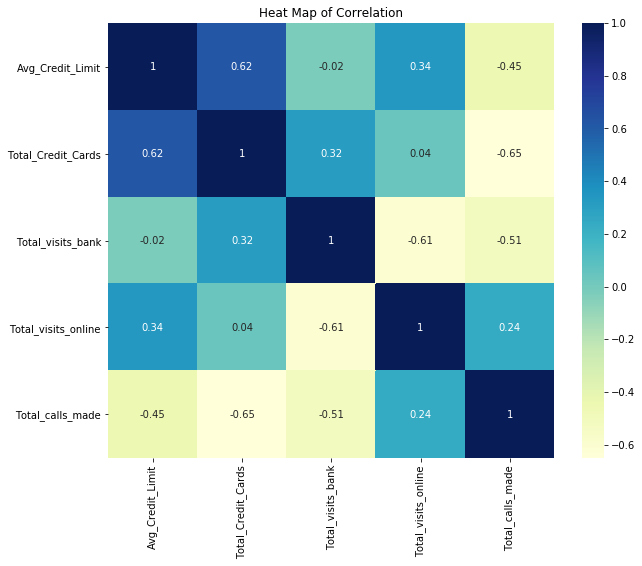

In [21]:

plt.figure(figsize=(10,8))
plt.title ("Heat Map of Correlation")
sns.heatmap(df.corr().round(2), cmap='YlGnBu',annot=True)

### Analysis and conclusion from Heatmap
While we do have a few varable pairs correlated, as defined by >0.5 threshold, I will not be droppign them.
Justification for keeping the variables is as follows :
        1) we are not suffering from the curse of dimentionality and jsut have a few columns(features) hence information                 contained in each is very valuable. If i would drop 1 column i would be droppign 20% of features available
        2) The correlation values are not excessve - only in the 0.5-0.65 range, hence there is much valuable data that remains            in each column. if the correlation was very  high, sucha as .80 and above perhaps dropping would be of consideration
        3) If needed, we can always us the PCA technique to merge valuable date from correlated columns into one column

# K-MEANS



Standardise Data

Standartization is an absolutely required step, because we will be measuring distance between datapoints and hence the units in which the points are measured must me meaningful - i.e if we have a column in very million of units and one in fractions,  the first column would by far overshadow the second and its usful data would be lost ..

Therefore, we will scale data according to its own STD using  Zscore
Hence distance of each point of data feature is represented as a % distance from its own mean ... hence as a proportion and therefore in same units ...


In [22]:
from  scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [46]:
# Kmeans clustering
from sklearn.cluster import KMeans
clusters=[]  # create a var to store values
inertia_vals=[]

for k in range (1,10,1):   # start with 1 cluster and go to 10 to see optimal K using Elbo Curve
    model=KMeans(n_clusters=k, random_state=5)
    model.fit(df_scaled)
    
    # append model to cluster list  to generate an ELBOW GRAPH
    clusters.append(model)
    inertia_vals.append(model.inertia_)  # this is  the Sum oif Squared Errors that is plotted on
                                        # Elbow Curve
    

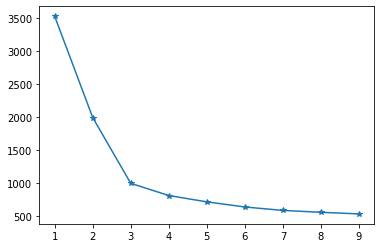

In [47]:
# plot Elbow Chart
plt.plot(range(1,10,1),inertia_vals, marker ='*')

In [25]:
# from elbow curve its obvious that the best fit is K=3, with further reductions in SSE of additional 
# clustersbeing minimal hence of little value and likely to be overfit

###  Check the Silhuette score to see if it supports a conclusion that K=3 is also providing a good cluster number

In [52]:
from sklearn.metrics import silhouette_score

for i in range(2,9,1) :
    
    print("---------------------------------------")
    print ('Clusters Number =', i)
    print(clusters[i])
    print("Silhouette score:",silhouette_score(df_scaled, clusters[i].predict(df_scaled))) #LAST BIT IT THE 
    

---------------------------------------
Clusters Number = 2
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)
Silhouette score: 0.5389025466898508
---------------------------------------
Clusters Number = 3
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)
Silhouette score: 0.3904489560547559
---------------------------------------
Clusters Number = 4
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)
Silhouette score: 0.36465631472269205
---------------------------------------
Clusters Number = 5
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n

###  Analysis
The best Silhuette Score is k=2 yet we have to balance that with Elbow Curve SSE measurement, and K=3 still seems  like a good balance between Silhouette score of inter cluster distance and inter cluster Elbow Curve k=3 SSE minimization


# Analyse clusters using Boxplot


In [26]:
# USE K=3 AS DETERMINED BY ELBOW CURVE VISUAL ANALYSIS
final_model=KMeans(3,random_state=5)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

In [27]:
# Append a Column to show what cluster group each observation belongs to
df_scaled['Cluster_Group']=prediction
print(" Assigned Cluster Group for each data point is:\n ")
df_scaled.head()

 Assigned Cluster Group for each data point is:
 


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_Group
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,1
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,0
2,0.643619,1.058973,-0.860451,0.267054,0.145528,1
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,1
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,2


In [28]:
# Use Boxplot to Analyse Clusters for chosen K=3
Clusters=df_scaled.groupby(['Cluster_Group'])
Clusters.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster_Group,,,,,
0,-0.684315,-1.059623,-0.901518,0.509544,1.148109
1,0.074275,0.373690,0.666395,-0.627808,-0.553005
2,2.492325,1.862226,-1.105763,2.563922,-0.874330


In [29]:
# the means of each 0-2 clusters are clearly distinct from one another, hence the means show distance from each other
# and hence each cluster is distinct. Its confirms good clustering into groups at K=3

In [30]:
# check the number of observations/clients per category
df_labels = pd.DataFrame(final_model.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

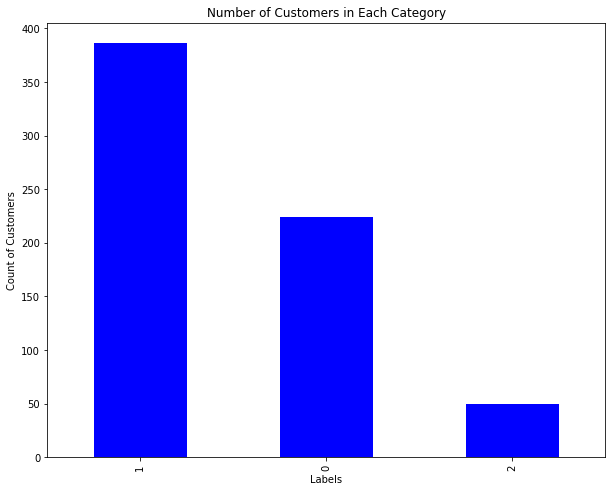

In [31]:
# plot number of clients per category
plt.figure(figsize=(10,8))
df_labels['labels'].value_counts().plot.bar(color='blue')
plt.xlabel("Labels")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022769315888>,
      dtype=object)

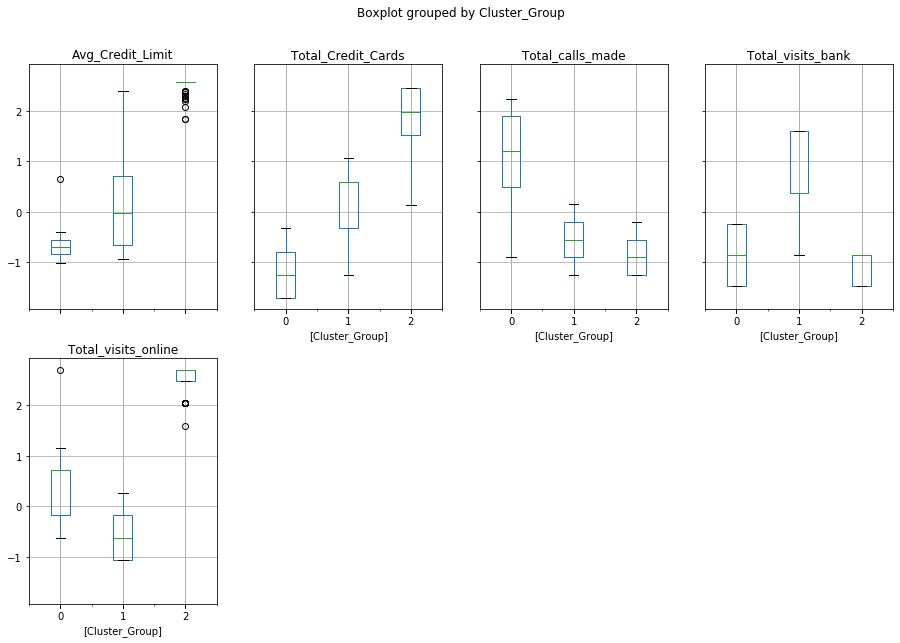

In [32]:
 #sns.boxplot(df[i])
df_scaled.boxplot(by='Cluster_Group',layout=(2,4), figsize=(15,10))

The Boxplot shows distinct clusters that do not overlap in general- where one group ends the other begins on the scale.
The cluster size should contain reasonable number of observations, and except for 3rd cluster in Ave Credit Limit, it seems each cluster  is sufficiently populated - no overfittingwith too small of cluster sizes

# Hierarchical Clustering 

In [33]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods=['ward','average','median','single','complete'] # apply different linkage methods
df_scaled_Hier=df_scaled.drop(['Cluster_Group'],axis=1) # get a scaled dataframe without the K-Means cluster Group index



In [34]:
from scipy.cluster.hierarchy import cophenet, dendrogram,linkage
from scipy.spatial.distance import pdist

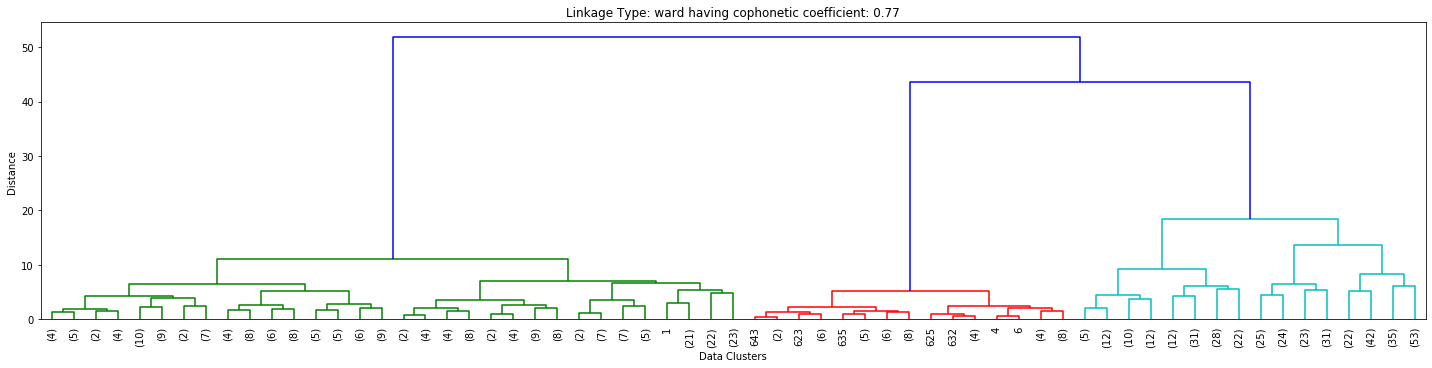

ward 0.7702265240776373


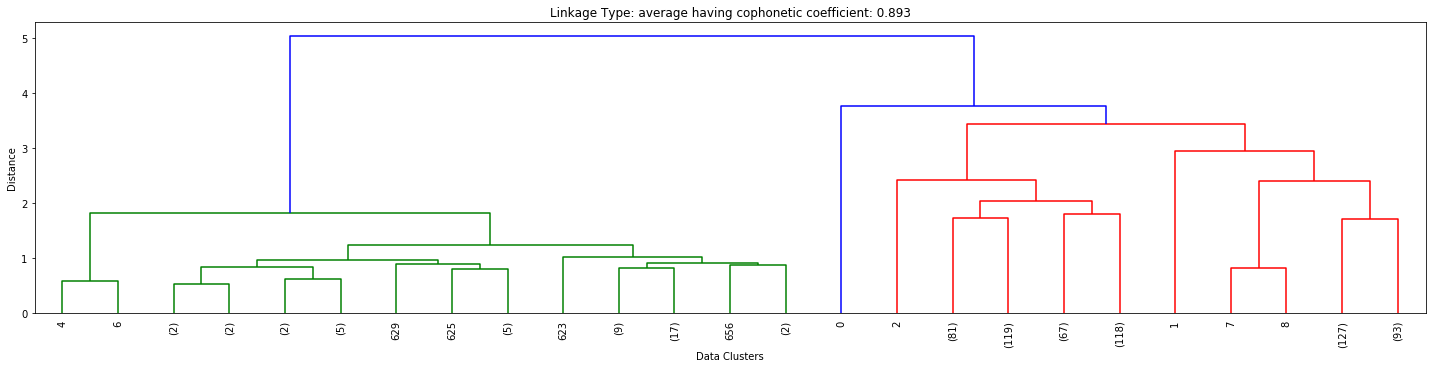

average 0.8926672966587861


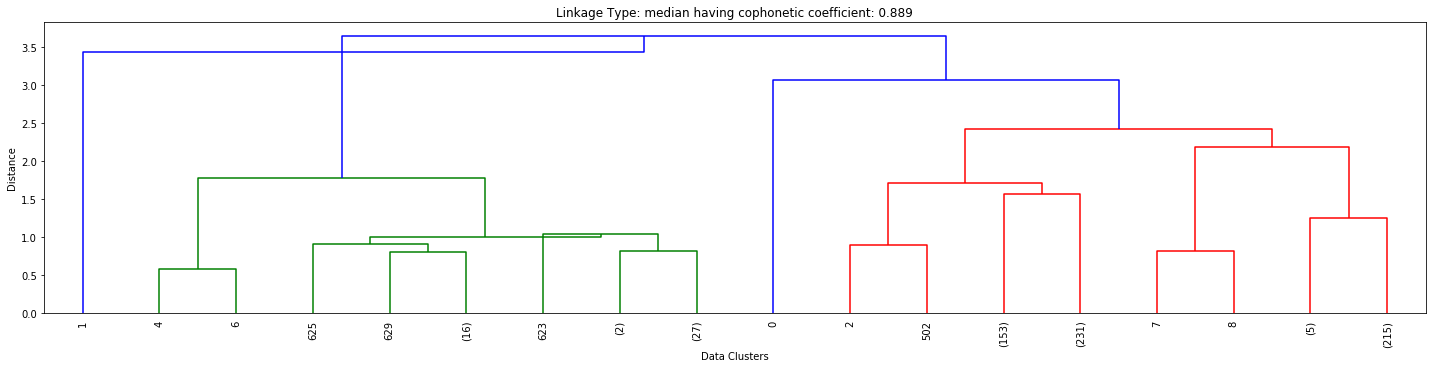

median 0.8887160179419454


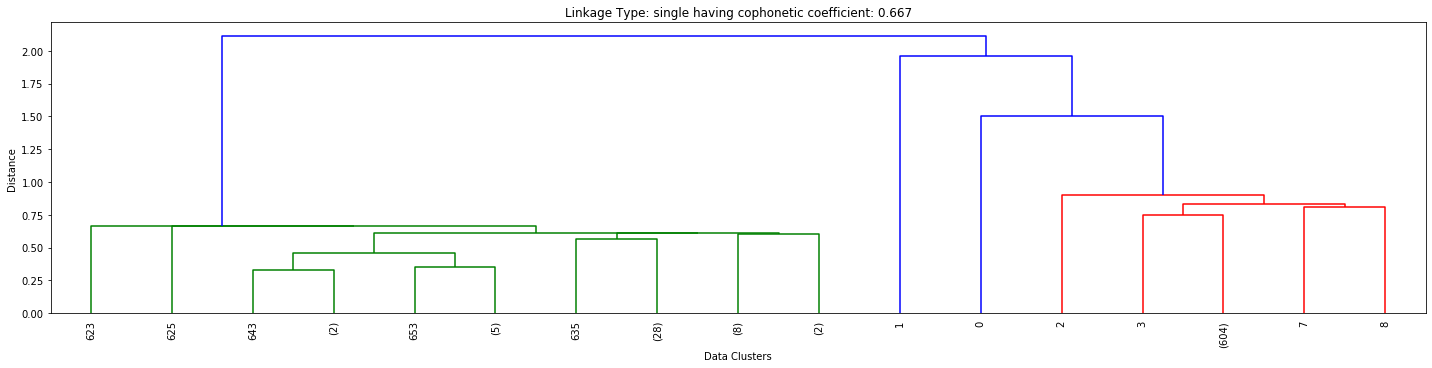

single 0.6666982080229052


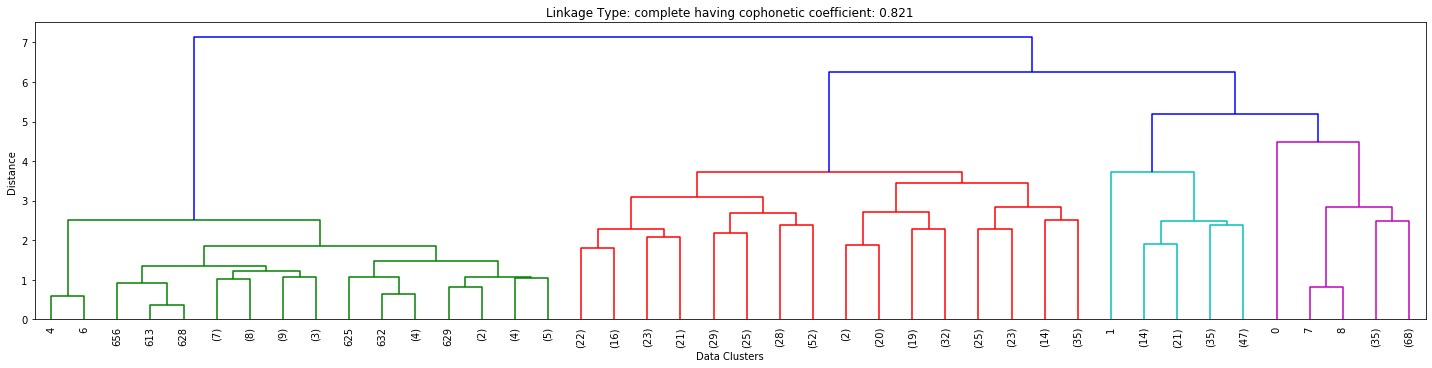

complete 0.8207884321476555


In [35]:
results_cophenetic_coef=[]

for i in linkage_methods :
    plt.figure(figsize=(20,5))
    plt.xlabel('Data Clusters')
    plt.ylabel('Distance')
    
    Z=linkage(df_scaled_Hier,i)
    
    cc,Cophin_dist=cophenet(Z,pdist(df_scaled_Hier))
    
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    
    plt.tight_layout()
    plt.title("Linkage Type: "+i+ " having cophonetic coefficient: " + str(round(cc,3)))
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)
    

In [36]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,ward,0.770227
1,average,0.892667
2,median,0.888716
3,single,0.666698
4,complete,0.820788


In [ ]:
# in conlcusion the Average linkage provides the highest Cophonetic Coefficient hence is the best method to use to form clusters

In [37]:
# form clusters using "average' linkage 
model= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(df_scaled_Hier)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [38]:
# add  Cluster Labels to Dataframe
df_scaled_Hier['H_Cluster']=model.labels_
df_scaled_Hier.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H_Cluster
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,0
2,0.643619,1.058973,-0.860451,0.267054,0.145528,0
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,0
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,1


### Analysis and Conclusion 
The linkage  methods have all resulted in a high score close to 1 hence the clustering is very good. We choose the highest linkage score of 0.89 among them which is "Average linkage", meaning the average of the distances of all pairs of points between clusters.

The score is clise to the perfect fit maximim score of 1 of the Cophonetic Coeficient  so we can say that the distances between clusters are far, and clusters are distinct, hence the model is good.


In [ ]:
# Draw Boxplots of the Hierarical Clusters

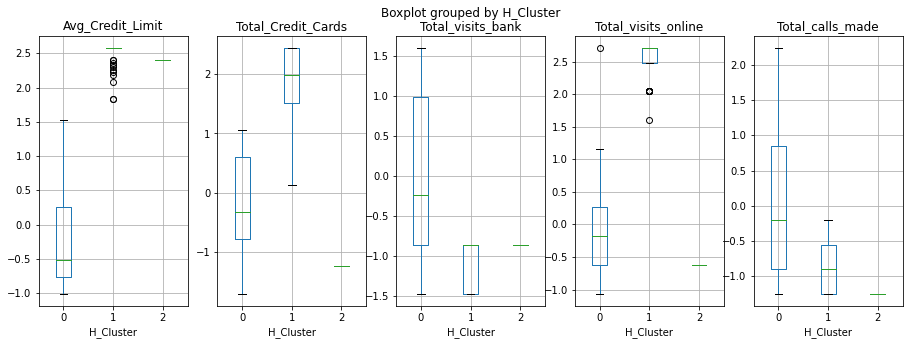

In [41]:
# 
cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))
for i, c in enumerate(cols):
    df_scaled_Hier.boxplot(column=c, by='H_Cluster', ax=ax[i]);

### Visual Analysis of Boxplots
The clusters are clearly separate and do not overlap, except a little on "Total_calls_made".  This good fit has been confirmed by high Cophonetic coefficient that shows that the clusters are distant (unique) from each other. 
The drawback I see,  is the low frequence of data observations in the 3rd cluster - its not very populated, hence potentially
we can even reduce the clusters from 3 to 2 without much penalty as on the 3rd cluster is almost non existant in the 3rd cluster.

## Calculate Average Silhuette Score for K-Means and Hierarical Clustering 

In [39]:
from sklearn.metrics import silhouette_score


In [40]:
# Hierarchical Silhuette Score
silhouette_H=silhouette_score(df_scaled_Hier,df_scaled_Hier['H_Cluster'])
print('The Silhuette Score for Hierarchical Clustering is ',silhouette_H.round(3))

The Silhuette Score for Hierarchical Clustering is  0.429


In [41]:
# K-Means Silhouette Score
silhouette_K=silhouette_score(df_scaled,df_scaled['Cluster_Group'])
print('The Silhuette Score for K-Means Clustering is ',silhouette_K.round(3))

The Silhuette Score for K-Means Clustering is  0.539


###  Silhouete Score Analysis

Silhouette score measures how far apart the clusters are from each other, and hence indicates how distinct they are...
The bigger distance the more distinct,(unique) and the better the model as measured by this score (we also need to look at (Elbow SSE- to check for inter cluster variance to complete the analysis)

#### The Silhouette Score for K-Means is higher than the Hierarchical Clustering score.
Hence this means that the clusters in K-means are more distinct, more far apart, hence a good fit - a good model. The Silhouette score ranges from -1 to +1, meaning as Silhouette score approaches 1, the clusters approach infinite distance between them - meaning they are really distinct.

If the Silhoue was close to zero it would mean that data points are just as close to their own cluster on average as tho another - not distinct. But that is not the case ...

if the shilouette score was negative, it means the model is all wrong with points being closer to another cluster than the one the are in.




# Analysis of Clusters Formed 

The tools of measuring the "goodness of fir" in unsupervised learining are  Elbow Curve and Silhouette Score with K-Means clustering.
With Hierarhical Clustering we use Cophonetic Coefficient among various linkage methods, as a measure leading to picking the be best linkage method (type of distance measurment between formed clusters) to ultimately get the highest Silhuette Score ...  

K-Means-Elbpow Curve
We do not know how many clusters to choose to start with, so we try different numbers of them (default Python being 8)
and then we check the reduction of Sum of Squared Errors (essentially variance) for each additional cluster. We choose the number of K, by judging if the SSE with additional increase in K clusters adds a meaningful reduction of SSE, while on the other hand balancing the fact too large a K will result in overfitting (such as each data point being own cluster where SSE=0,) and increased complexity of calculation at no significant beneft.

We choose the K where the slope of the Elbow Curve flattens where K numbers are the X axis. This means additional increase clusters adds no significant SSE reduction to cluster.

While Elbow Curve provides an indication of SSE acceptable SSE size within a cluster, a measure of inner cluster distance average from centeroid,  it does not indicate how distinct the cluster is compared to others, and whether some data points can switch easily from one group to another.  Hence we introduce the :

Silhouette Score - this is a measure of the distance between clusters and hence a distinction between them. The bigger the distance the better, with maximm score distance of 1 and range of score values -1 to 1. This has been covered extensivelly above.

Hierarhical Clustering - Cophonetic Distance
This is a measure between forming clusters themselves on the dendrogram chart, as we permit bigger distances between them and (agglomeratve direction), and the actual Eucledian distance between them (or Ward distance which integrates on smallest variance combination). If the differenxe measured between dendrogramic distance on tree, and linkage distance (mostly eucledian  type) is close to zero ( both numbers are similar, and difference between them is small) them Cophonetic Distance being =1-that difference, will be close to 1 hence a good fit.


Box Plots
For both K-Means and Hierarhical clustering the boxplots showed in general no overlap, with good distinction between data groups, and one started where the other ended - no intersections over boxplot scaled distance at K=3
The only issue I saw that the population 3rd cluster in basically all attributes was very low ... hence this indicates that we may be able to reduce clusters to 2 at little penalty since few points remain in 3rd cluster and would by sheer low numbers not movethe average SSE error a lot but ... according to Elbov Curve we stayed with K=3 and i did not do more analysis to check population of each cluster as we were not taught to evaluate model against population size....



The key point valuable to a business in unsupervised data, is to form similar groups about which we can draw conclusions (sick or not sick patients, free or paying premium subscribers etc...) to find patterns that have valuable information for us and more so we can study what triggers a movement of data points between groups such as non paying to paying customer or healthy to sick individual ...


## Solving Conclusion and Advice

### AllLife Bank  advice
#### The Bank wanted to know how lead marketing campaigns better and to improve service delivery !
As far as the clusters formed in this case  -  Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made

We can now check to see which customers prefer interaction method with the bank.
With the customers being grouped by  clusters of Visits to bank, calls to bank or online visits, we can now approach the clients of each particular newly formed cluster group in way of their preferred interaction/communication with bank.

Hence have an account manager reach out to make in person appointments with customers who prefer in bank visits, call customers who frequently call, and make online marketing efforts to clients who reach the bank online frequently. 

We can add to that interactive information secondary data such as card spending limits and total cards to preare serice offer via that preferred choice of interaction, about a topic that would be of interest to client... Hence improving  service delivery and product marketing methods.

